In [2]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree, ensemble
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score


In [49]:
#손으로 쓴 숫자 데이터 읽기
digits= datasets.load_digits()


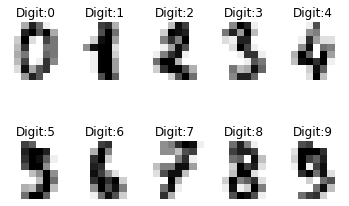

In [45]:
#이미지를 2행 5열로 표시

for label, img in zip(digits.target[:10], digits.images[:10]):
    plt.subplot(2,5, label+1)
    plt.axis('off')
    plt.imshow(img, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Digit:{0}'.format(label))
plt.show()

In [53]:
#3과 8의 데이터 위치를 구하기
flag_3_8 = (digits.target==3) +(digits.target==8)
print(flag_3_8)
#3과 8의 데이터를 구하기
images= digits.images[flag_3_8]
labels= digits.target[flag_3_8]
print(images)
#3과 8의 이미지 데이터를 1차원화
images= images.reshape(images.shape[0],-1)

#분류기 생성
n_samples = len(flag_3_8[flag_3_8])
train_size = int(n_samples *3/5)
classifier = ensemble.AdaBoostClassifier(base_estimator = tree.DecisionTreeClassifier(max_depth=3), n_estimators=50)
classifier.fit(images[:train_size], labels[:train_size])

[False False False ...  True False  True]
[[[ 0.  0.  7. ...  1.  0.  0.]
  [ 0.  8. 13. ...  4.  0.  0.]
  [ 0.  2.  1. ...  0.  0.  0.]
  ...
  [ 0.  0.  0. ... 10.  8.  0.]
  [ 0.  0.  8. ... 14.  9.  0.]
  [ 0.  0.  7. ...  9.  0.  0.]]

 [[ 0.  0.  9. ...  1.  0.  0.]
  [ 0.  0. 12. ... 12.  0.  0.]
  [ 0.  0.  9. ... 15.  4.  0.]
  ...
  [ 0.  3. 16. ... 13.  2.  0.]
  [ 0.  1. 15. ... 16.  8.  0.]
  [ 0.  0. 11. ... 11.  1.  0.]]

 [[ 0.  2.  9. ...  9.  3.  0.]
  [ 0.  4. 13. ... 16.  8.  0.]
  [ 0.  0.  0. ... 15.  3.  0.]
  ...
  [ 0.  0.  0. ... 15.  4.  0.]
  [ 0.  1.  5. ... 16.  6.  0.]
  [ 0.  2. 12. ... 11.  0.  0.]]

 ...

 [[ 0.  0.  5. ...  0.  1.  0.]
  [ 0.  0. 11. ... 13.  6.  0.]
  [ 0.  0.  2. ... 12.  1.  0.]
  ...
  [ 0.  0.  8. ... 11.  0.  0.]
  [ 0.  0. 11. ...  9.  0.  0.]
  [ 0.  0.  6. ...  3.  0.  0.]]

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ...

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=3,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [12]:
#분류기 성능을 확인
expected = labels[train_size:]
predicted = classifier.predict(images[train_size:])

print('Accuracy:\n', accuracy_score(expected, predicted))
print('Confusion_matrix:\n', confusion_matrix(expected, predicted))
print('Precision:\n', precision_score(expected, predicted, pos_label=3))
print('Recall:\n', recall_score(expected, predicted, pos_label=3))
print('F-measure:\n', f1_score(expected, predicted,pos_label=3))

Accuracy:
 1.0
Confusion_matrix:
 [[74]]
Precision:
 1.0
Recall:
 1.0
F-measure:
 1.0
